In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Use the tuple() function to display the lat/long combo.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

carnarvon au
vardo no
mount gambier au
carrollton us
illoqqortoormiut gl
mys shmidta ru
teguise es
rikitea pf
machico pt
okato nz
new norfolk au
jamestown sh
oreanda ua
iqaluit ca
albany au
vaini to
bandarbeyla so
lowestoft gb
san cristobal ec
albany au
carnarvon au
punta arenas cl
sentyabrskiy ru
samsun tr
kyela tz
muzhi ru
hermanus za
jamestown sh
jamestown sh
tiksi ru
vaini to
albany au
amderma ru
ushuaia ar
rikitea pf
qaanaaq gl
acarau br
marcona pe
guerrero negro mx
victoria sc
naze jp
gamba ga
ushuaia ar
butaritari ki
hobart au
bolama gw
ushuaia ar
paita pe
luena ao
albany au
awjilah ly
mataura pf
qaanaaq gl
nikolskoye ru
paita pe
lumsden ca
ossora ru
sinnamary gf
rikitea pf
narsaq gl
ahvaz ir
rikitea pf
constitucion mx
chuy uy
lebu cl
hermanus za
codrington ag
vardo no
margate za
namibe ao
biltine td
attawapiskat ca
sorvag fo
tasiilaq gl
dicabisagan ph
jamestown sh
mahebourg mu
rehoboth na
tuktoyaktuk ca
rikitea pf
ushuaia ar
rikitea pf
khatanga ru
busselton au
punta arenas cl
a

souillac mu
bredasdorp za
albany au
chicama pe
longyearbyen sj
codrington ag
saskylakh ru
mar del plata ar
haines junction ca
vao nc
tuktoyaktuk ca
vaini to
rikitea pf
joshimath in
mataura pf
ganzhou cn
airai pw
albany au
cape town za
dikson ru
brae gb
albany au
buldana in
rabo de peixe pt
caucaia br
kalanguy ru
attawapiskat ca
vaini to
labutta mm
tasiilaq gl
tasiilaq gl
new norfolk au
port alfred za
yellowknife ca
lebu cl
sept-iles ca
roald no
saint-philippe re
manadhoo mv
pevek ru
ushuaia ar
port elizabeth za
vaitupu wf
hilo us
ceres za
punta arenas cl
attawapiskat ca
vanavara ru
gilbues br
ushuaia ar
ailigandi pa
hobart au
taolanaro mg
la tuque ca
pontianak id
isangel vu
butaritari ki
alakurtti ru
taoudenni ml
hasaki jp
paamiut gl
busselton au
rikitea pf
castro cl
port-gentil ga
shadegan ir
mahebourg mu
barrow us
kismayo so
jamestown sh
ushuaia ar
albany au
ostrovnoy ru
bozeman us
east london za
akureyri is
east london za
hilo us
zhangye cn
rikitea pf
rawson ar
amderma ru
victoria s

chuy uy
saint-philippe re
ushuaia ar
samusu ws
tsihombe mg
belushya guba ru
baijiantan cn
northam au
cumana ve
sobolevo ru
husavik is
touros br
ushuaia ar
punta arenas cl
east london za
busselton au
banda aceh id
fez ma
palau mx
barentsburg sj
poum nc
busselton au
ormara pk
ribeira grande pt
avera pf
ushuaia ar
ushuaia ar
port elizabeth za
bonthe sl
sola vu
alice springs au
kavieng pg
poum nc
mount gambier au
vaini to
puerto ayora ec
goderich sl
hami cn
port elizabeth za
gandia es
tanete id
vaini to
salalah om
carnarvon au
hilo us
koster za
new norfolk au
lianzhou cn
maniitsoq gl
cabo san lucas mx
ribeira grande pt
mar del plata ar
port elizabeth za
beni cd
tilichiki ru
porto velho br
antofagasta cl
malwan in
hithadhoo mv
port lincoln au
taolanaro mg
cidreira br
avera pf
candido mendes br
pires do rio br
hermanus za
kodiak us
albany au
ushuaia ar
kapaa us
castro cl
yellowknife ca
bastrop us
cape town za
puerto ayora ec
emba kz
new norfolk au
pacific grove us
laguna br
adrar dz
balgazyn

In [6]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each lat/long combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
#Import the Requests library
import requests

#Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feb61a95c051936b868ddd445f0a3849


In [8]:
#Create an enpoint URL for a city. 
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feb61a95c051936b868ddd445f0a3849&q=Boston


In [9]:
#Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
          #Parse the JSON and retrieve data.
          city_weather = requests.get(city_url).json()
          #Parse out the needed data.
          city_lat = city_weather["coord"]["lat"]
          city_lng = city_weather["coord"]["lon"]
          city_max_temp = city_weather["main"]["temp_max"]
          city_humidity = city_weather["main"]["humidity"]
          city_clouds = city_weather["clouds"]["all"]
          city_wind = city_weather["wind"]["speed"]
          city_country = city_weather["sys"]["country"]
          #Convert the date to ISO standard.
          city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
          #Append the city information into the city_data list.
          city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    
    #If an error is experienced, skip the city
    except:
          print("City not found. Skipping...")
          pass

#Indicate that Data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | carrollton
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | teguise
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | machico
Processing Record 10 of Set 1 | okato
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | oreanda
City not found. Skipping...
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | bandarbeyla
Processing Record 18 of Set 1 | lowestoft
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of S

City not found. Skipping...
Processing Record 38 of Set 4 | khasan
Processing Record 39 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 4 | leh
Processing Record 41 of Set 4 | aykhal
Processing Record 42 of Set 4 | yialos
City not found. Skipping...
Processing Record 43 of Set 4 | nicoya
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | burica
City not found. Skipping...
Processing Record 47 of Set 4 | devils lake
Processing Record 48 of Set 4 | kharp
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | oranjemund
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | berbera
Processing Record 3 of Set 5 | stornoway
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | san ramon
Processing Record 6 of Set 5 | pirgos
Processing Record 7 of Set 5 | haigerloch
Processing Record 8 of Set 5 | georgetown
Processing Re

Processing Record 28 of Set 8 | vanavara
Processing Record 29 of Set 8 | gilbues
Processing Record 30 of Set 8 | ailigandi
Processing Record 31 of Set 8 | la tuque
Processing Record 32 of Set 8 | pontianak
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | alakurtti
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | port-gentil
Processing Record 37 of Set 8 | shadegan
Processing Record 38 of Set 8 | kismayo
Processing Record 39 of Set 8 | bozeman
Processing Record 40 of Set 8 | akureyri
Processing Record 41 of Set 8 | zhangye
Processing Record 42 of Set 8 | rawson
Processing Record 43 of Set 8 | mbanza-ngungu
Processing Record 44 of Set 8 | portovelo
Processing Record 45 of Set 8 | lata
Processing Record 46 of Set 8 | saldanha
Processing Record 47 of Set 8 | evensk
Processing Record 48 of Set 8 | sola
Processing Record 49 of Set 8 | oksfjord
Processing Record 50 of Set 8 | puerto lleras
Processing Record 1 of Set 9 | ouesso
Processing Record 2 

Processing Record 18 of Set 12 | zhezkazgan
Processing Record 19 of Set 12 | camacari
Processing Record 20 of Set 12 | tsumeb
Processing Record 21 of Set 12 | brownsville
Processing Record 22 of Set 12 | puerto cabezas
Processing Record 23 of Set 12 | zhigansk
Processing Record 24 of Set 12 | beloha
Processing Record 25 of Set 12 | kon tum
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | tougan
Processing Record 29 of Set 12 | berlevag
Processing Record 30 of Set 12 | kahului
Processing Record 31 of Set 12 | baijiantan
Processing Record 32 of Set 12 | cumana
Processing Record 33 of Set 12 | husavik
Processing Record 34 of Set 12 | fez
Processing Record 35 of Set 12 | palau
Processing Record 36 of Set 12 | poum
Processing Record 37 of Set 12 | ormara
Processing Record 38 of Set 12 | avera
Processing Record 39 of Set 12 | bonthe
Processing Record 40 of Set 12 | alice springs
Processing Record 41 of Set 12 | kavi

In [12]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,68.00,64,75,13.87,AU,2020-10-22 00:03:11
1,Vardo,70.37,31.11,33.75,88,41,8.03,NO,2020-10-22 00:08:03
2,Mount Gambier,-37.83,140.77,57.20,67,72,12.75,AU,2020-10-22 00:08:03
3,Carrollton,32.95,-96.89,82.40,54,40,17.22,US,2020-10-22 00:08:03
4,Teguise,29.06,-13.56,69.80,83,20,3.36,ES,2020-10-22 00:08:04
5,Rikitea,-23.12,-134.97,74.46,70,70,6.42,PF,2020-10-22 00:03:06
6,Machico,32.70,-16.77,64.40,59,20,8.05,PT,2020-10-22 00:08:04
7,Okato,-39.20,173.88,61.00,84,64,3.00,NZ,2020-10-22 00:08:04
8,New Norfolk,-42.78,147.06,63.00,50,84,1.99,AU,2020-10-22 00:08:05
9,Jamestown,42.10,-79.24,55.99,93,90,6.93,US,2020-10-22 00:06:06


In [13]:
#Rearrange order of the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2020-10-22 00:03:11,-24.87,113.63,68.00,64,75,13.87
1,Vardo,NO,2020-10-22 00:08:03,70.37,31.11,33.75,88,41,8.03
2,Mount Gambier,AU,2020-10-22 00:08:03,-37.83,140.77,57.20,67,72,12.75
3,Carrollton,US,2020-10-22 00:08:03,32.95,-96.89,82.40,54,40,17.22
4,Teguise,ES,2020-10-22 00:08:04,29.06,-13.56,69.80,83,20,3.36
5,Rikitea,PF,2020-10-22 00:03:06,-23.12,-134.97,74.46,70,70,6.42
6,Machico,PT,2020-10-22 00:08:04,32.70,-16.77,64.40,59,20,8.05
7,Okato,NZ,2020-10-22 00:08:04,-39.20,173.88,61.00,84,64,3.00
8,New Norfolk,AU,2020-10-22 00:08:05,-42.78,147.06,63.00,50,84,1.99
9,Jamestown,US,2020-10-22 00:06:06,42.10,-79.24,55.99,93,90,6.93


In [14]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
#Import the time module. 
import time
#Get today's date in seconds.
today = time.time()
today

1603325645.5592895

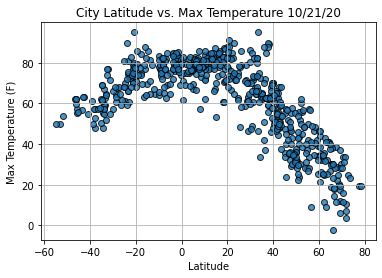

In [19]:
#build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

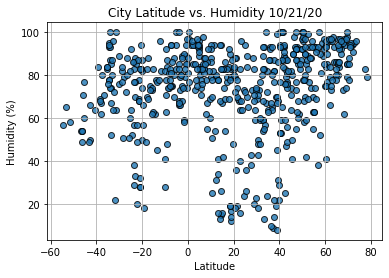

In [22]:
#build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

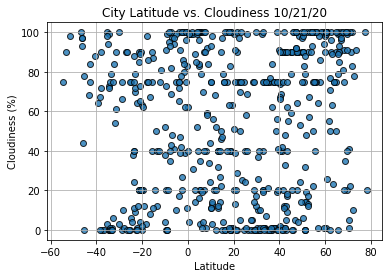

In [23]:
#build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

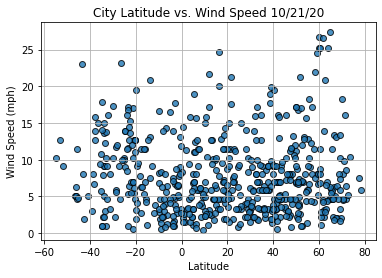

In [24]:
#build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [25]:
#import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [26]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [27]:
#Perform linear regression. 
(slope, intercept, r_value, p_value, std_err) = linregress(lats,temps)

#Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")


y = -0.45x + 92.94
The p-value is: 0.011


In [28]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat*slope + intercept) for lat in lats]

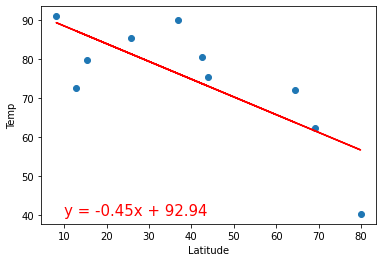

In [46]:
#Import Matplotlib.
import matplotlib.pyplot as plt

#Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

#Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")

#Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [54]:
#Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Perform Linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)

    #Plot the regression line with the x-values and the y coordinates based on the slope and intercept.
    plt.plot(x_values, regress_values, "r")

    #Annotate the text for the line equation and add its coordinates. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [55]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

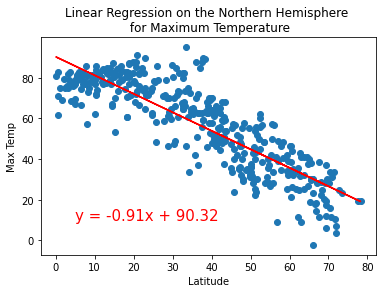

In [56]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,10))

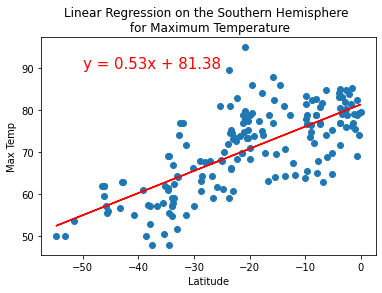

In [57]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

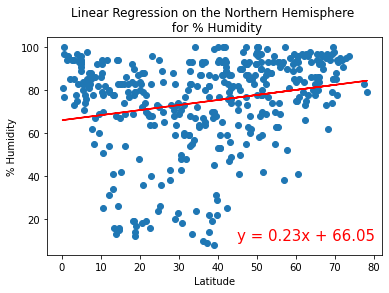

In [60]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45,10))

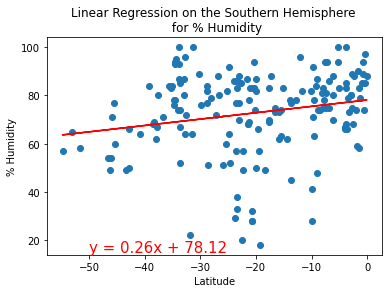

In [62]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50, 15))

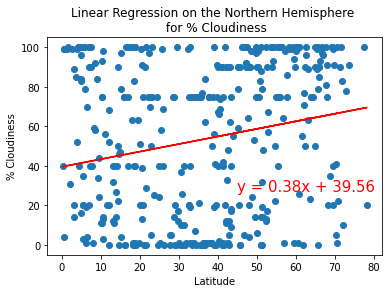

In [65]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (45,27))

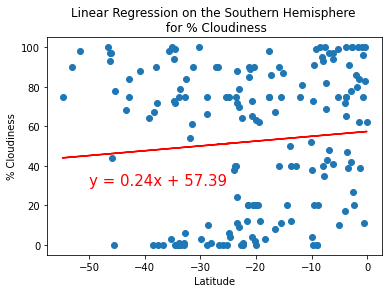

In [67]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,30))